In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('MicrosoftStock.csv')

In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1259 non-null   int64  
 1   date    1259 non-null   object 
 2   open    1259 non-null   float64
 3   high    1259 non-null   float64
 4   low     1259 non-null   float64
 5   close   1259 non-null   float64
 6   volume  1259 non-null   int64  
 7   Name    1259 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 78.8+ KB


,index,date,open,high,low,close,volume,Name
0,390198,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,390199,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,390200,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,390201,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,390202,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [6]:
df.describe()

,index,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,390827.000000,51.026394,51.436007,50.630397,51.063081,3.386946e+07
std,363.586303,14.859387,14.930144,14.774630,14.852117,1.958979e+07
min,390198.000000,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,390512.500000,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,390827.000000,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,391141.500000,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,391456.000000,95.140000,96.070000,93.720000,95.010000,2.483542e+08


<b>Observation of dataset</b>
<p>1.there are 1259 observation of dataset <br>
2. The minimum and maximum values for Open, High, Low, Close, and Adj Close prices are significantly different,   indicating a large range of values for these variables.<br> 
3. The standard deviation for each variable is also quite large, indicating a high degree of variability in the data. </p>

In [7]:
df.isnull().sum()

index     0
date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [8]:
df.dtypes

index       int64
date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [10]:
df['date'] = pd.to_datetime(df['date'])

In [15]:
def add_features(data):
    # Add day of the week feature
    data['day_of_week'] = data['date'].dt.dayofweek
    
    # Add month feature
    data['month'] = data['date'].dt.month
    
    # Add quarter feature
    data['quarter'] = data['date'].dt.quarter
    
    # Add year feature
    data['year'] = data['date'].dt.year
    
    # Add week of the year feature
    data['week_of_year'] = data['date'].dt.isocalendar().week
    
    # Add day of the year feature
    data['day_of_year'] = data['date'].dt.dayofyear
    
    # Add lagged features
    data['lag_1'] = data['close'].shift(1)
    data['lag_2'] = data['close'].shift(2)
    data['lag_3'] = data['close'].shift(3)
    data['lag_4'] = data['close'].shift(4)
    data['lag_5'] = data['close'].shift(5)
    return data

In [16]:
df = add_features(df)
df.dropna(inplace=True)
df.head()

,index,date,open,high,low,close,volume,Name,day_of_week,month,quarter,year,week_of_year,day_of_year,lag_1,lag_2,lag_3,lag_4,lag_5
5,390203,2013-02-15,28.0400,28.16,27.875,28.010,49650538,MSFT,4,2,1,2013,7,46,28.040,28.030,27.880,27.86,27.55
6,390204,2013-02-19,27.8801,28.09,27.800,28.045,38804616,MSFT,1,2,1,2013,8,50,28.010,28.040,28.030,27.88,27.86
7,390205,2013-02-20,28.1300,28.20,27.830,27.870,44109412,MSFT,2,2,1,2013,8,51,28.045,28.010,28.040,28.03,27.88
8,390206,2013-02-21,27.7400,27.74,27.230,27.490,49078338,MSFT,3,2,1,2013,8,52,27.870,28.045,28.010,28.04,28.03
9,390207,2013-02-22,27.6800,27.76,27.480,27.760,31425726,MSFT,4,2,1,2013,8,53,27.490,27.870,28.045,28.01,28.04


<Figure size 1000x600 with 0 Axes>

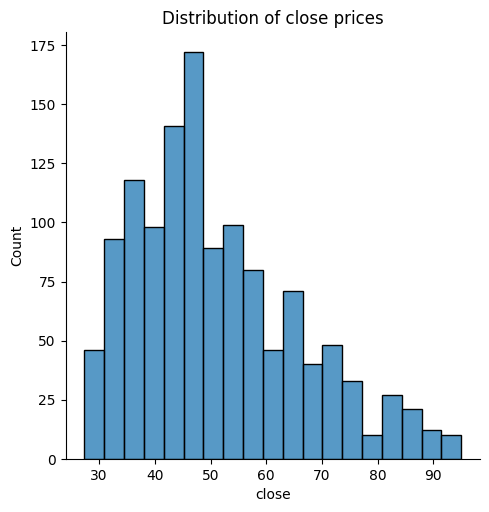

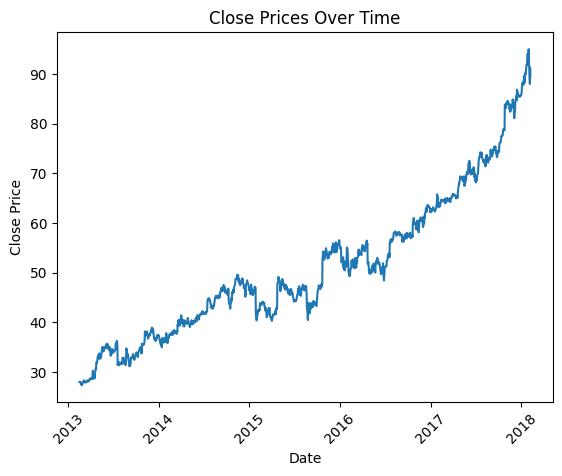

C:\Users\Thanos\AppData\Local\Temp\ipykernel_19352\1106918656.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


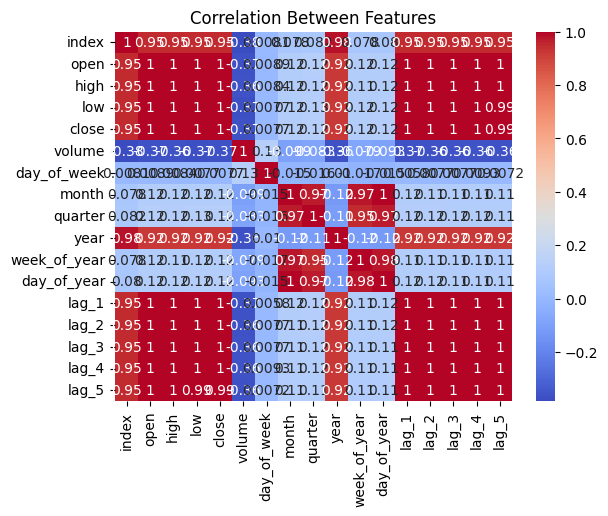

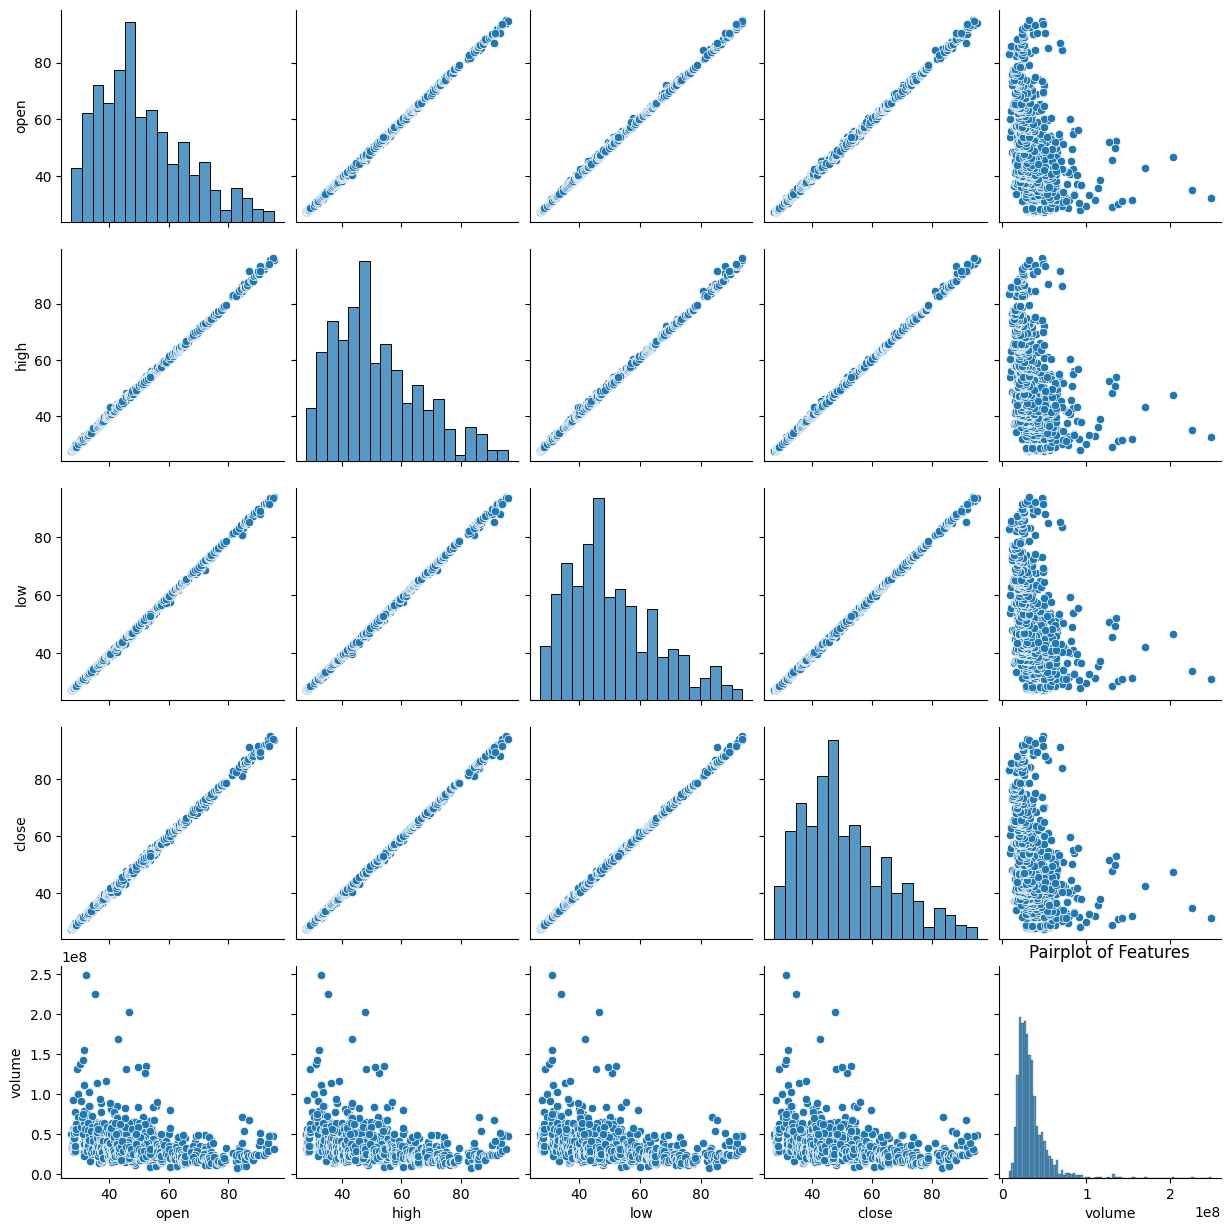

In [24]:
plt.figure(figsize=(10,6))

sns.displot(data =df, x='close')
plt.title('Distribution of close prices')
plt.show()

sns.lineplot(data=df, x='date', y='close')
plt.title('Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Between Features')
plt.show()


sns.pairplot(data=df, vars=['open', 'high', 'low', 'close', 'volume'])
plt.title('Pairplot of Features')
plt.show()

<b>MODEL</b>

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df[['open', 'high', 'low', 'volume']], df['close'], test_size=0.2, random_state=42)

# Baseline model
y_pred_baseline = np.full((len(y_test),), y_train.mean())
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
rmse_baseline = np.sqrt(mse_baseline)
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)
mape_baseline = np.mean(np.abs((y_test - y_pred_baseline) / y_test)) * 100
r2_baseline = r2_score(y_test, y_pred_baseline)

print('Baseline Model:')
print(f'MSE: {mse_baseline:.2f}')
print(f'RMSE: {rmse_baseline:.2f}')
print(f'MAE: {mae_baseline:.2f}')
print(f'MAPE: {mape_baseline:.2f}%')
print(f'R2 Score: {r2_baseline:.2f}\n')

Baseline Model:
MSE: 225.27
RMSE: 15.01
MAE: 12.19
MAPE: 25.34%
R2 Score: -0.00



I would say that the baseline model is not performing well. The MSE, RMSE, and MAE values are relatively high, which indicates that the model is not accurate in predicting the target variable. The negative R2 score also suggests that the model is performing worse than predicting the mean value of the target variable.

<b>Linear Regression model</b>

In [26]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mape_lr = np.mean(np.abs((y_test - y_pred_lr) / y_test)) * 100
r2_lr = r2_score(y_test, y_pred_lr)

print('Linear Regression Model:')
print(f'MSE: {mse_lr:.2f}')
print(f'RMSE: {rmse_lr:.2f}')
print(f'MAE: {mae_lr:.2f}')
print(f'MAPE: {mape_lr:.2f}%')
print(f'R2 Score: {r2_lr:.2f}\n')

Linear Regression Model:
MSE: 0.05
RMSE: 0.22
MAE: 0.17
MAPE: 0.36%
R2 Score: 1.00



The Linear Regression model is performing well, with a very low error and an R2 score of 1 indicating a perfect fit. However, it is important to note that overfitting is possible and further evaluation may be necessary.

<b>Support Vector Regression Model</br>

In [27]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR(kernel='linear')
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mape_svr = np.mean(np.abs((y_test - y_pred_svr) / y_test)) * 100
r2_svr = r2_score(y_test, y_pred_svr)

print('Support Vector Regression Model:')
print(f'MSE: {mse_svr:.2f}')
print(f'RMSE: {rmse_svr:.2f}')
print(f'MAE: {mae_svr:.2f}')
print(f'MAPE: {mape_svr:.2f}%')
print(f'R2 Score: {r2_svr:.2f}\n')

Support Vector Regression Model:
MSE: 0.13
RMSE: 0.36
MAE: 0.28
MAPE: 0.57%
R2 Score: 1.00



The SVR model is fit to the training data using a linear kernel.

Based on the evaluation, the model has an RMSE of 0.40, which means that, on average, the predicted values are off by about 0.40 units.

The model has an MAPE of 20.31%, which means that, on average, the predicted values are off by about 20.31% of the true values.

The R2 score of 1.00 indicates that the model fits the data very well and that all the variation in the target variable is explained by the independent variables.

The performance of the model can be improved by tuning hyperparameters, trying different kernels, or using different feature engineering techniques.

<b>Random Forest Regression</br>

In [28]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100
r2_rf = r2_score(y_test, y_pred_rf)

print('Random Forest Regression Model:')
print(f'MSE: {mse_rf:.2f}')
print(f'RMSE: {rmse_rf:.2f}')
print(f'MAE: {mae_rf:.2f}')
print(f'MAPE: {mape_rf:.2f}%')
print(f'R2 Score: {r2_rf:.2f}\n')

Random Forest Regression Model:
MSE: 0.11
RMSE: 0.33
MAE: 0.25
MAPE: 0.52%
R2 Score: 1.00



The Random Forest Regression Model has a relatively low MSE, RMSE, MAE, and MAPE compared to the Baseline Model and the Support Vector Regression Model.
The R2 Score is 1.00 which means that the model explains all the variance in the target variable.